# LOAN APPLICATION STATUS PREDICTION



LOADING THE MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

Loading the Dataset

In [2]:
las=pd.read_csv("loan_application_status.csv")

In [3]:
las

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
las.shape

(614, 13)

Observation;

There are 614 rows and 13 columns.

In [5]:
las.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


First 5 rows.

In [6]:
las.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Last 5 rows.

In [7]:
las.sample(3).T

,407,373,259
Loan_ID,LP002314,LP002205,LP001864
Gender,Female,Male,Male
Married,No,No,Yes
Dependents,0,1,3+
Education,Not Graduate,Graduate,Not Graduate
Self_Employed,No,No,No
ApplicantIncome,2213,3062,4931
CoapplicantIncome,0.0,1987.0,0.0
LoanAmount,66.0,111.0,128.0
Loan_Amount_Term,360.0,180.0,360.0


Random 3 sample of Loan Application Dataset. 

In [8]:
las.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are 3 types 

1-object
2-int
3-float


In [9]:
las.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are some  null values in Dataset.

4 float data,1 int data and 8 object data in this dataset.

# Checking the null values--

<AxesSubplot:>

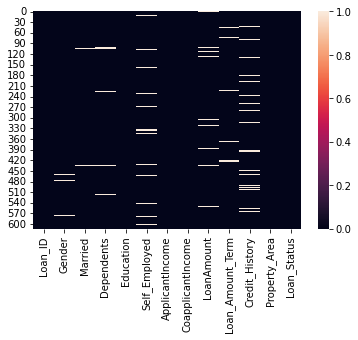

In [10]:
sns.heatmap(las.isnull())

Blanks in Heatmap it means null values are there.

In [11]:
las.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are 13 null values in Gender,3 null values in Married,15 null values in Dependents,32 null values in Self_Employed,22 null values in LoanAmount,14 null values in Loan_Amount_term and 50 null values in Credit_History.

# Filling Null Valuse

In [12]:
las["Gender"].isnull().sum()

13

In [13]:
las["Gender"].mode()

0    Male
dtype: object

In [14]:
las["Gender"].fillna(las["Gender"].mode()[0],inplace=True)

In [15]:
las["Gender"].isnull().sum()

0

Now No Null Valuse in Gender column.

In [16]:
las["Married"].isnull().sum()

3

In [17]:
las["Married"].mode()

0    Yes
dtype: object

In [18]:
las["Married"].fillna(las["Married"].mode()[0],inplace=True)

In [19]:
las["Married"].isnull().sum()

0

Now No null values in Married columns.

In [20]:
las["Dependents"].isnull().sum()

15

In [21]:
las["Dependents"].mode()

0    0
dtype: object

In [22]:
las["Dependents"].fillna(las["Dependents"].mode()[0],inplace=True)

In [23]:
las["Dependents"].isnull().sum()

0

Now no null values in Dependents column.

In [24]:
las["Self_Employed"].isnull().sum()

32

In [25]:
las["Self_Employed"].mode()

0    No
dtype: object

In [26]:
las["Self_Employed"].fillna(las['Self_Employed'].mode()[0],inplace=True)

In [27]:
las["Self_Employed"].isnull().sum()

0

Now no null values in Self_Employed column.

In [28]:
las["LoanAmount"].isnull().sum()

22

In [29]:
las["LoanAmount"].median()

128.0

In [30]:
las["LoanAmount"].fillna(las["LoanAmount"].median(),inplace=True)

In [31]:
las["LoanAmount"].isnull().sum()

0

Now no null values in LoanAmount column.

In [32]:
las["Loan_Amount_Term"].isnull().sum()

14

In [33]:
las["Loan_Amount_Term"].median()

360.0

In [34]:
las["Loan_Amount_Term"].fillna(las["Loan_Amount_Term"].median(),inplace=True)

In [35]:
las["Loan_Amount_Term"].isnull().sum()

0

Now no null values in Loan_Amount_Term column.

In [36]:
las["Credit_History"].isnull().sum()

50

In [37]:
las["Credit_History"].median()

1.0

In [38]:
las["Credit_History"].fillna(las["Credit_History"].median(),inplace=True)

In [39]:
las["Credit_History"].isnull().sum()

0

Now no null values in Credit_History column.

<AxesSubplot:>

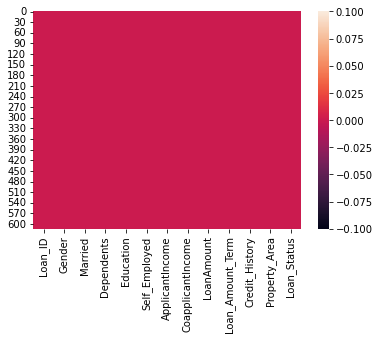

In [40]:
sns.heatmap(las.isnull())

Now no balnks in heatmap,it means all null values has been filled.

# STATISTICAL SUMMARY

In [41]:
las.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Observation;

HIgh variance in 75% and 100% in all columns, and variance in mean and meadian,it means all datas are skewed.
    


In [42]:
las.corr().sum().sort_values(ascending=False)

LoanAmount           1.790751
ApplicantIncome      1.383429
CoapplicantIncome    1.024364
Credit_History       0.987206
Loan_Amount_Term     0.926341
dtype: float64

<AxesSubplot:>

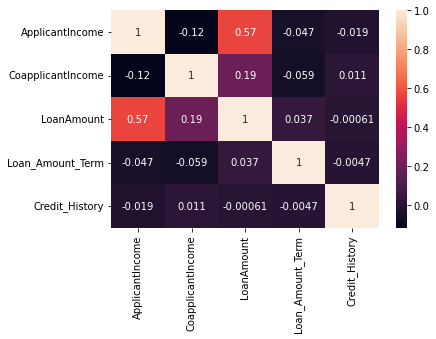

In [43]:
sns.heatmap(las.corr(),annot=True)

Datas are very less correlated with each other.

# Data Visualization

In [44]:
las.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [45]:
las["Loan_ID"].value_counts().sort_values(ascending=True)

LP001002    1
LP001038    1
LP001036    1
LP001005    1
LP001006    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002959    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

Observation;

Loan_ID is just id number of loan so we can drop his column.

In [46]:
las.drop("Loan_ID",axis=1,inplace=True)

In [47]:
las.keys()

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Loan_ID has been dropped.

In [48]:
las["Gender"].value_counts().sort_values(ascending=True)

Female    112
Male      502
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender'>

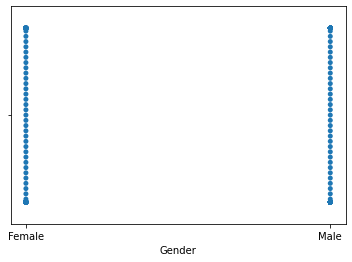

In [49]:
sns.swarmplot("Gender",data=las)

<AxesSubplot:xlabel='Gender', ylabel='count'>

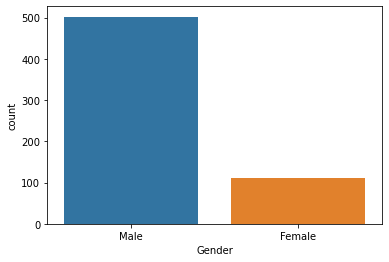

In [50]:
sns.countplot("Gender",data=las)

Male are higher than Female.

In [51]:
las["Married"].value_counts().sort_values(ascending=True)

No     213
Yes    401
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

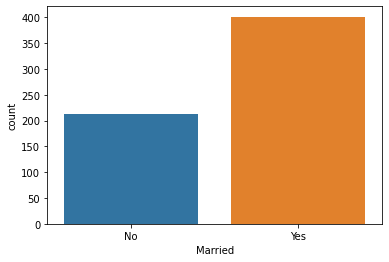

In [52]:
sns.countplot("Married",data=las)

Observation;

out of 614 people 401 people are Married,it means Married peoples are higher.

In [53]:
las["Dependents"].value_counts().sort_values(ascending=False)

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

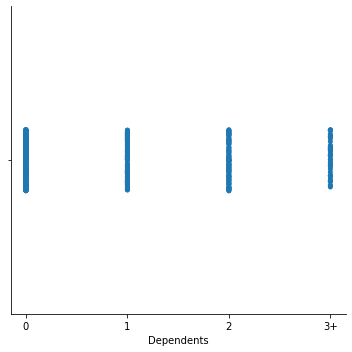

In [54]:
sns.catplot("Dependents",data=las)

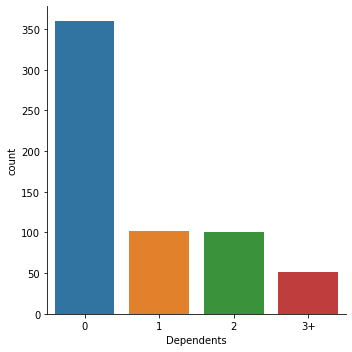

In [55]:
sns.catplot("Dependents",data=las,kind="count")

Observation:
    
People on whom there is no dependent are the most.

In [56]:
las["Education"].value_counts().sort_values(ascending=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='Count'>

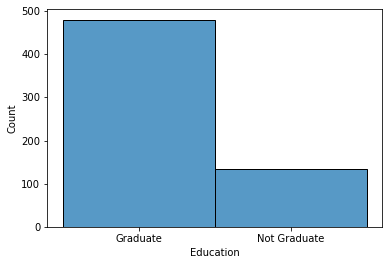

In [57]:
sns.histplot(las["Education"])

<AxesSubplot:xlabel='Education', ylabel='count'>

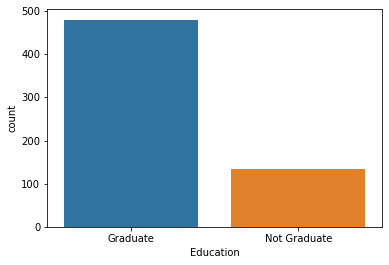

In [58]:
sns.countplot("Education",data=las)

Graduate people are higher than Not Graduate.

In [59]:
las["Self_Employed"].value_counts().sort_values(ascending=False)

No     532
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

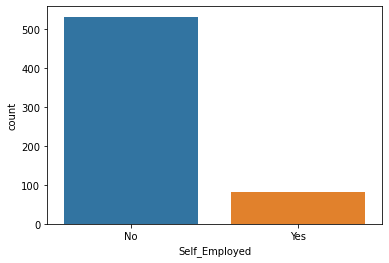

In [60]:
sns.countplot("Self_Employed",data=las)

There are more people who are not self employed.

In [61]:
las["ApplicantIncome"].value_counts().sort_values(ascending=False)

2500     9
6000     6
2600     6
4583     6
3333     5
        ..
2726     1
9357     1
6406     1
16120    1
7583     1
Name: ApplicantIncome, Length: 505, dtype: int64

<AxesSubplot:xlabel='ApplicantIncome'>

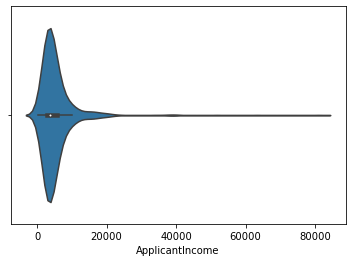

In [62]:
sns.violinplot("ApplicantIncome",data=las)

ApplicantIncome is higher in 2500 to 7000.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

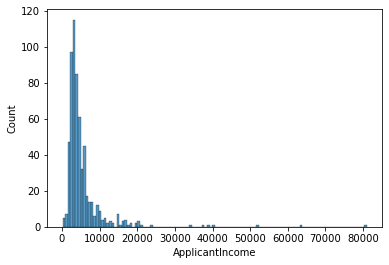

In [63]:
sns.histplot(las["ApplicantIncome"])

ApplicantIncome is higher in between 0 to 10000.

In [64]:
las["CoapplicantIncome"].value_counts().sort_values(ascending=False)

0.0       273
2083.0      5
1666.0      5
2500.0      5
1625.0      3
         ... 
2087.0      1
1664.0      1
3683.0      1
2079.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

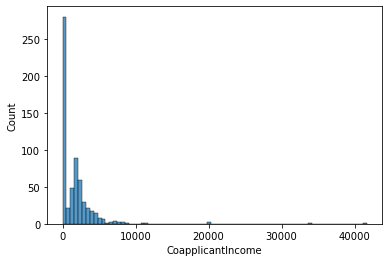

In [65]:
sns.histplot(las["CoapplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome'>

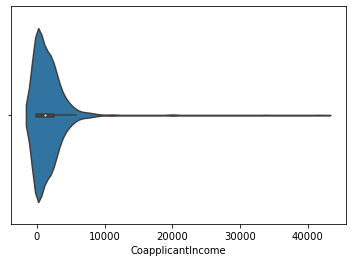

In [66]:
sns.violinplot("CoapplicantIncome",data=las)

CoapplicantIncome 0 is the most.

In [67]:
las["Loan_Amount_Term"].value_counts().sort_values(ascending=False)

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term'>

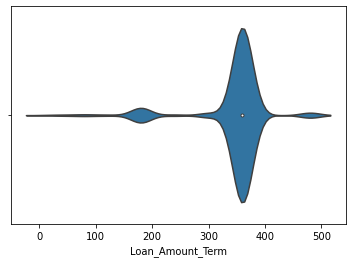

In [68]:
sns.violinplot("Loan_Amount_Term",data=las)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

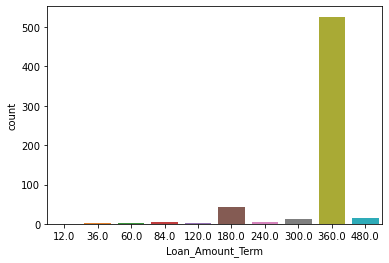

In [69]:
sns.countplot("Loan_Amount_Term",data=las)

360 Loan_Amount_Term is the most.

In [70]:
las["LoanAmount"].value_counts().sort_values(ascending=False)

128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
570.0     1
145.0     1
243.0     1
250.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

<AxesSubplot:xlabel='LoanAmount'>

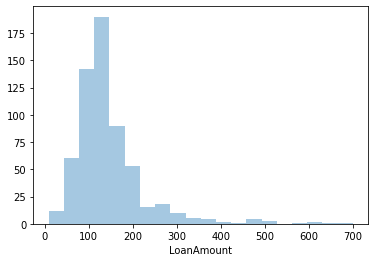

In [71]:
sns.distplot(las["LoanAmount"],kde=False,bins=20)

LoanAmount data is not normally distributed.

<AxesSubplot:xlabel='LoanAmount'>

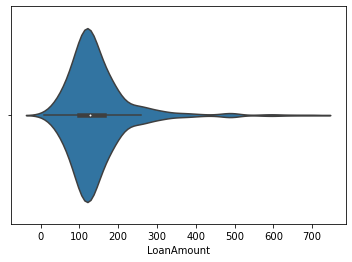

In [72]:
sns.violinplot("LoanAmount",data=las)

LoanAmount is higher in between 100 to 200.

In [73]:
las["Credit_History"].value_counts().sort_values(ascending=False)

1.0    525
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

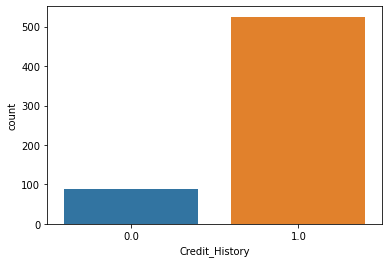

In [74]:
sns.countplot("Credit_History",data=las)

Type 1 Credit_history is higher.

<AxesSubplot:xlabel='Credit_History'>

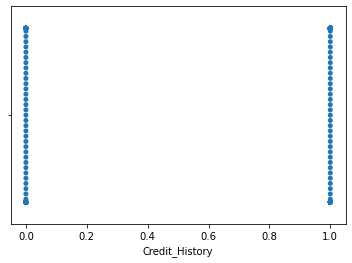

In [75]:
sns.swarmplot("Credit_History",data=las)

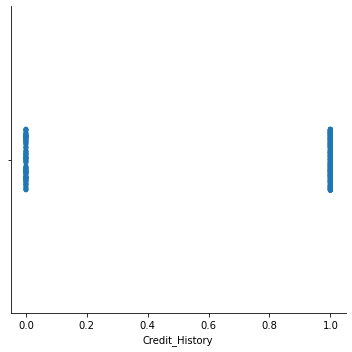

In [76]:
sns.catplot("Credit_History",data=las)

1.0 type of Credit_History is the most.

In [77]:
las["Property_Area"].value_counts().sort_values(ascending=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

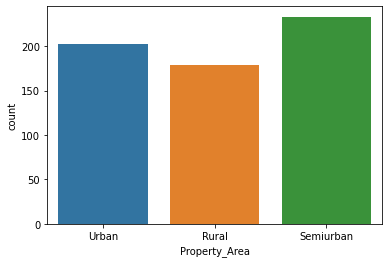

In [78]:
sns.countplot("Property_Area",data=las)

<AxesSubplot:xlabel='Property_Area'>

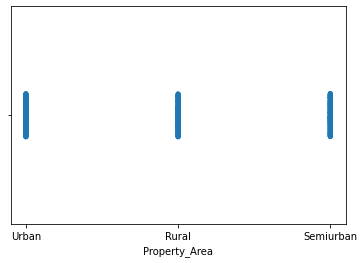

In [79]:
sns.stripplot("Property_Area",data=las)

All data are almost same.


In [80]:
las["Loan_Status"].value_counts().sort_values(ascending=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

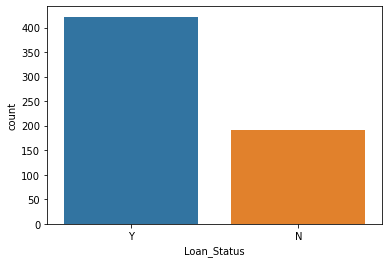

In [81]:
sns.countplot("Loan_Status",data=las)

Loan_Status y is the most.

In [82]:
las.keys()

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

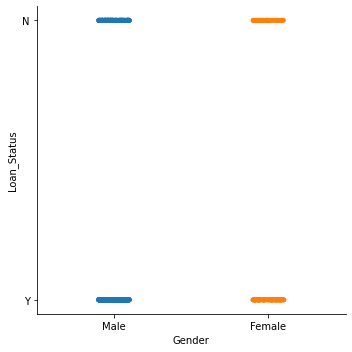

In [84]:
sns.catplot("Gender","Loan_Status",data=las)

Y type of Loan_status is higher than N.

<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

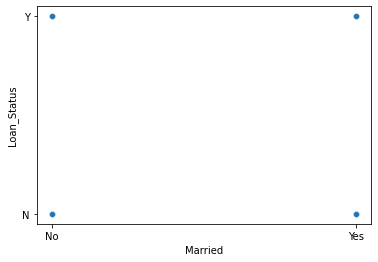

In [85]:
sns.scatterplot("Married","Loan_Status",data=las)

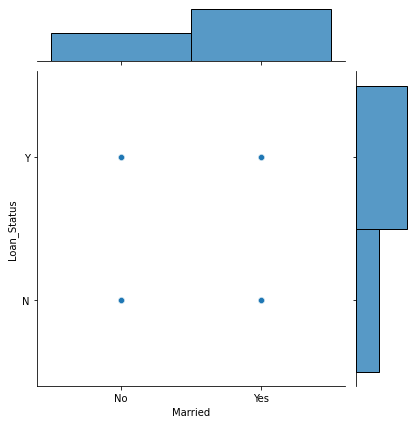

In [86]:
sns.jointplot("Married","Loan_Status",data=las)

In Both data yes is higher, it means People who are married have higher loan status in Yes.

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

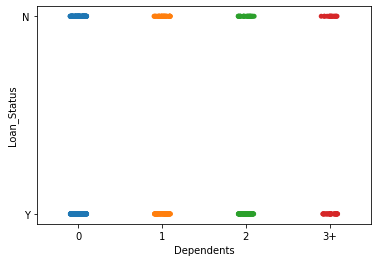

In [87]:
sns.stripplot("Dependents","Loan_Status",data=las)

People whose Dependency is 0 have higher loan status in Yes.

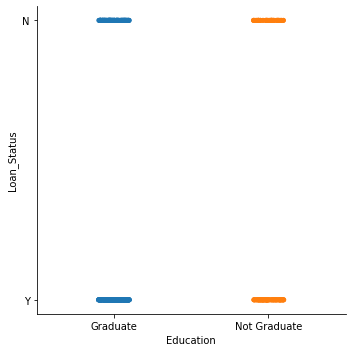

In [88]:
sns.catplot('Education',"Loan_Status",data=las)

People who are Graduated is 0 have higher loan status in Yes.

<AxesSubplot:xlabel='Education', ylabel='Loan_Status'>

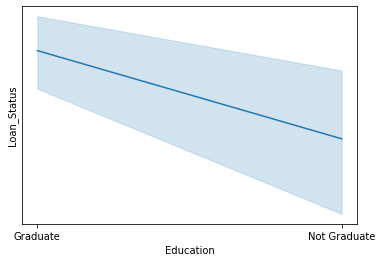

In [89]:
sns.lineplot("Education","Loan_Status",data=las)

Loan status is decreasing with education.

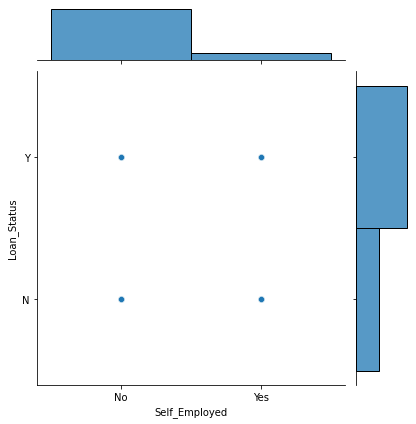

In [90]:
sns.jointplot("Self_Employed","Loan_Status",data=las)

Those who are self employed, their loan status is higher in No.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

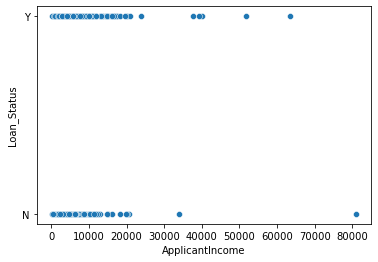

In [92]:
sns.scatterplot("ApplicantIncome","Loan_Status",data=las)

The loan status of the people whose income is high is high in Yes.

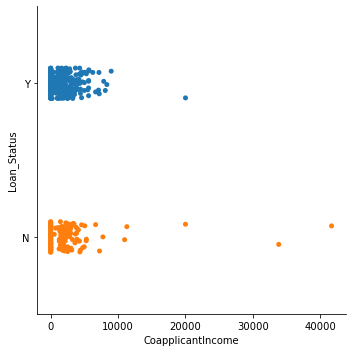

In [94]:
sns.catplot("CoapplicantIncome","Loan_Status",data=las)

Loan status of people with coapplicanincome is higher in No.

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

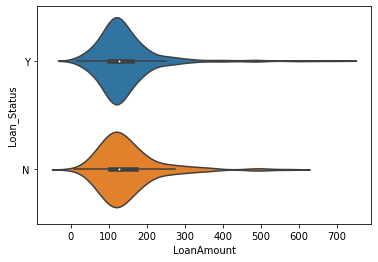

In [96]:
sns.violinplot("LoanAmount","Loan_Status",data=las)

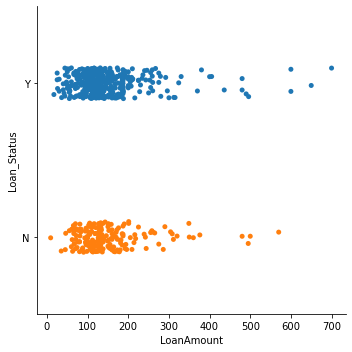

In [97]:
sns.catplot("LoanAmount","Loan_Status",data=las)

People whose loan amount is between 100 to 200, their loan status is high in Yes.

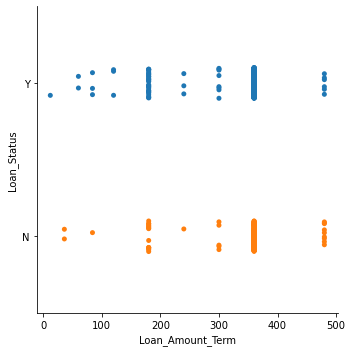

In [98]:
sns.catplot("Loan_Amount_Term","Loan_Status",data=las)

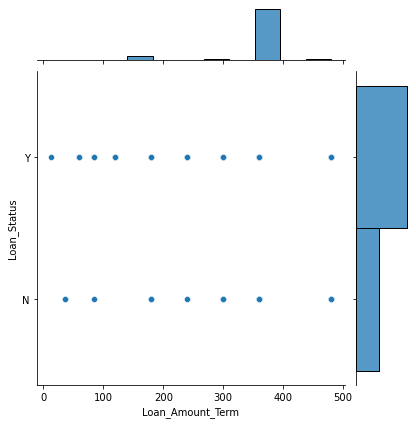

In [99]:
sns.jointplot("Loan_Amount_Term","Loan_Status",data=las)

Loan status of loan_amount_term is high in Yes

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

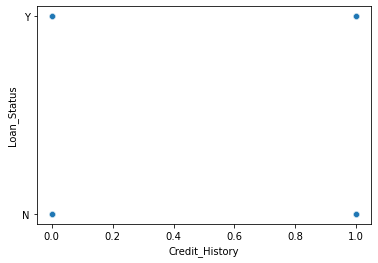

In [100]:
sns.scatterplot("Credit_History","Loan_Status",data=las)

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

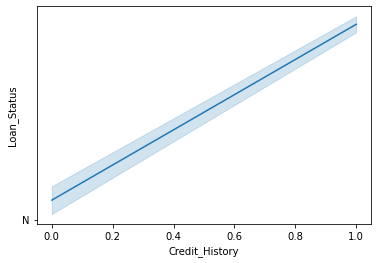

In [101]:
sns.lineplot("Credit_History","Loan_Status",data=las)

LoanStatus is increasing With Credit History.

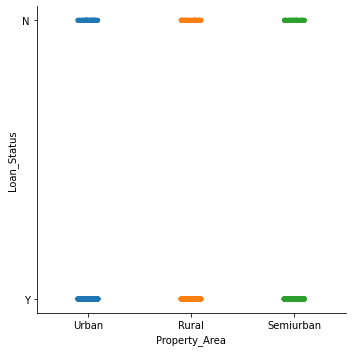

In [102]:
sns.catplot("Property_Area","Loan_Status",data=las)

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Status'>

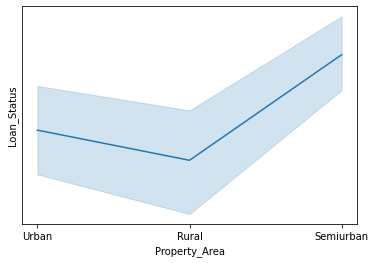

In [103]:
sns.lineplot("Property_Area","Loan_Status",data=las)

Loan_satus is increasing in semiurban type of property_Area.

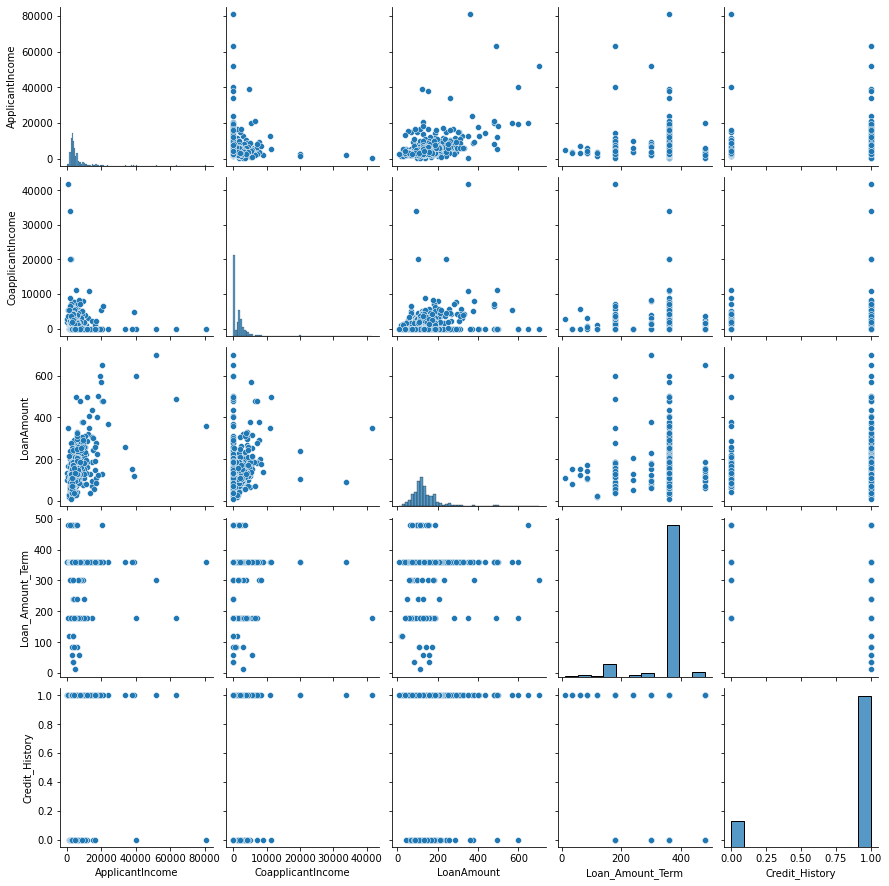

In [104]:
sns.pairplot(las)

Observation;

Skewness is present in Dataset.

# Checking The Skewness

In [105]:
las.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

Obsevartion;

We can see skewness is present in All columns.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

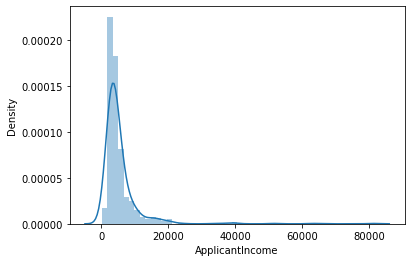

In [106]:
sns.distplot(las["ApplicantIncome"])

Skewness is present ApplicantIncome.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

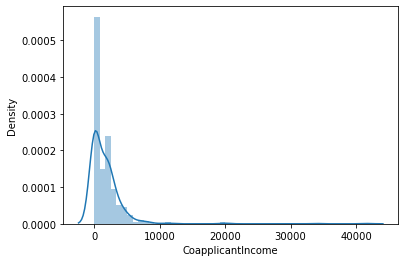

In [107]:
sns.distplot(las["CoapplicantIncome"])

Skewness is present in CoapplicantIncome.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

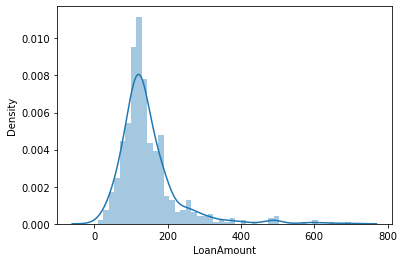

In [108]:
sns.distplot(las["LoanAmount"])

Very Less Skewness is present in LoanAmount.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

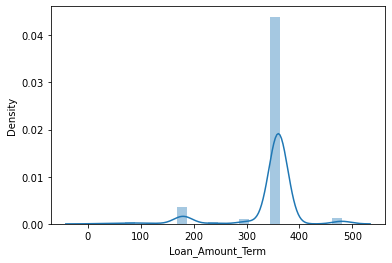

In [109]:
sns.distplot(las["Loan_Amount_Term"])

Skewness is present in Loan_Amount_Term.

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

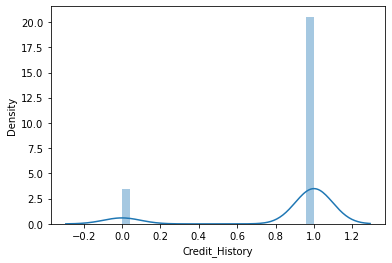

In [110]:
sns.distplot(las["Credit_History"])

Skewness is present in Credit_history.

# LabelEncoding

In [111]:
from sklearn.preprocessing import LabelEncoder

In [112]:
las.sample()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
318,Female,No,1,Graduate,No,3541,0.0,112.0,360.0,1.0,Semiurban,Y


In [113]:
le=LabelEncoder()
objects=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents"]
for i in objects:
    las[i]=le.fit_transform(las[i])
    
objects

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Dependents']

In [114]:
las.sample(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
584,1,1,1,0,0,2787,1917.0,146.0,360.0,0.0,0,0
343,1,1,3,1,0,3173,0.0,74.0,360.0,1.0,1,1


# Removing the Skewness

In [115]:
from sklearn.preprocessing import power_transform , PowerTransformer

In [116]:
las.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0


In [117]:
x=las.drop("Loan_Status",axis=1)

In [118]:
x.sample()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
15,1,0,0,0,0,4950,0.0,125.0,360.0,1.0,2


In [119]:
PowerTransformer()

PowerTransformer()

In [120]:
new_x=power_transform(x)
print(new_x)

[[ 4.72342640e-01 -1.37208932e+00 -8.27104306e-01 ...  1.75540037e-01
   4.11732692e-01  1.19356680e+00]
 [ 4.72342640e-01  7.28815525e-01  8.54259122e-01 ...  1.75540037e-01
   4.11732692e-01 -1.35000343e+00]
 [ 4.72342640e-01  7.28815525e-01 -8.27104306e-01 ...  1.75540037e-01
   4.11732692e-01  1.19356680e+00]
 ...
 [ 4.72342640e-01  7.28815525e-01  8.54259122e-01 ...  1.75540037e-01
   4.11732692e-01  1.19356680e+00]
 [ 4.72342640e-01  7.28815525e-01  1.31670248e+00 ...  1.75540037e-01
   4.11732692e-01  1.19356680e+00]
 [-2.11710719e+00 -1.37208932e+00 -8.27104306e-01 ...  1.75540037e-01
  -2.42876026e+00  2.36103342e-03]]


In [121]:
x=pd.DataFrame(new_x,columns=x.columns).skew().sort_values(ascending=False)

In [122]:
x

Self_Employed        2.159796
Education            1.367622
Dependents           0.441404
Loan_Amount_Term     0.392571
LoanAmount           0.020831
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
Property_Area       -0.158267
Married             -0.644850
Gender              -1.648795
Credit_History      -2.021971
dtype: float64

Now Skewness has been removed.

# Checking Outliers

Gender                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Married               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Dependents            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Education             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Self_Employed           AxesSubplot(0.125,0.518913;0.168478x0.16413)
ApplicantIncome      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
CoapplicantIncome    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
LoanAmount           AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Loan_Amount_Term        AxesSubplot(0.125,0.321957;0.168478x0.16413)
Credit_History       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Property_Area        AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Loan_Status          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

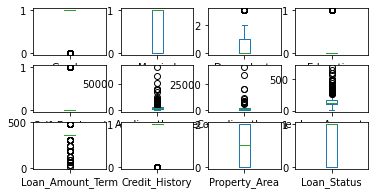

In [123]:
las.plot(kind="box",subplots=True,layout=(4,4))

Outliers are present in loan application dataset.

# Removing the outliers

In [124]:
from scipy.stats import zscore

In [125]:
new_las=np.array(las)

In [126]:
new_las

array([[1., 0., 0., ..., 1., 2., 1.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 2., 1.],
       ...,
       [1., 1., 1., ..., 1., 2., 1.],
       [1., 1., 2., ..., 1., 2., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [127]:
z=np.abs(zscore(las))
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.211241,0.273231,0.411733,1.223298,0.674519
1,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.211241,0.273231,0.411733,1.318513,1.482537
2,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.948996,0.273231,0.411733,1.223298,0.674519
3,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.306435,0.273231,0.411733,1.223298,0.674519
4,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.056551,0.273231,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.117107,1.372089,0.737806,0.528362,0.392601,0.410130,0.554487,0.889500,0.273231,0.411733,1.318513,0.674519
610,0.472343,0.728816,2.236021,0.528362,0.392601,0.212557,0.554487,1.258378,2.522836,0.411733,1.318513,0.674519
611,0.472343,0.728816,0.253470,0.528362,0.392601,0.437174,0.472404,1.276168,0.273231,0.411733,1.223298,0.674519
612,0.472343,0.728816,1.244745,0.528362,0.392601,0.357064,0.554487,0.490816,0.273231,0.411733,1.223298,0.674519


In [128]:
thereshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [129]:
new_las=las[(z<3).all(axis=1)]
new_las

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [130]:
new_las.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0


In [131]:
new_las.shape

(577, 12)

In [132]:
las.shape

(614, 12)

37 rows has been removed.
it means outliers has been removed.

In [133]:
las=new_las
las.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [134]:
x=las.drop('Loan_Status',axis=1)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


# MULTICOLLINEARITY

In [135]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [136]:
def vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [137]:
vif(x)

,variables,VIF FACTOR
0,Gender,6.201755
1,Married,3.796835
2,Dependents,1.785550
3,Education,1.324395
4,Self_Employed,1.226932
5,ApplicantIncome,5.457918
6,CoapplicantIncome,2.499015
7,LoanAmount,11.278431
8,Loan_Amount_Term,13.232676
9,Credit_History,6.303854


No high Multicollinearty in Loan Application datset.

# Scaling The data

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 0.47713685, -1.36251079, -0.72331271, ...,  0.23085296,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.23085296,
         0.41851254, -1.30652215],
       [ 0.47713685,  0.73393914, -0.72331271, ...,  0.23085296,
         0.41851254,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.23085296,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  1.28801951, ...,  0.23085296,
         0.41851254,  1.22747207],
       [-2.09583477, -1.36251079, -0.72331271, ...,  0.23085296,
        -2.38941464, -0.03952504]])

Dataset has been scaled.

# Prediction

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [154]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [143]:
las.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [145]:
x=las.drop("Loan_Status",axis=1)

In [146]:
x.sample()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
363,1,1,0,0,0,3013,3033.0,95.0,300.0,1.0,2


In [149]:
y=las["Loan_Status"]

In [150]:
y.sample()

64    0
Name: Loan_Status, dtype: int32

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.18,random_state=41)

In [153]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(473, 11)
(104, 11)
(473,)
(104,)


In [155]:
gp=GaussianProcessClassifier()
gp.fit(x_train,y_train)
gppred=gp.predict(x_test)
print(accuracy_score(y_test,gppred)*100)
print(classification_report(y_test,gppred))
print(confusion_matrix(y_test,gppred))

38.46153846153847
              precision    recall  f1-score   support

           0       0.30      0.90      0.45        29
           1       0.82      0.19      0.30        75

    accuracy                           0.38       104
   macro avg       0.56      0.54      0.38       104
weighted avg       0.68      0.38      0.34       104

[[26  3]
 [61 14]]


In [156]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfcpred=rfc.predict(x_test)
print(accuracy_score(y_test,rfcpred)*100)
print(classification_report(y_test,rfcpred))
print(confusion_matrix(y_test,rfcpred))

78.84615384615384
              precision    recall  f1-score   support

           0       0.71      0.41      0.52        29
           1       0.80      0.93      0.86        75

    accuracy                           0.79       104
   macro avg       0.76      0.67      0.69       104
weighted avg       0.78      0.79      0.77       104

[[12 17]
 [ 5 70]]


In [157]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtcpred=dtc.predict(x_test)
print(accuracy_score(y_test,dtcpred)*100)
print(classification_report(y_test,dtcpred))
print(confusion_matrix(y_test,dtcpred))

64.42307692307693
              precision    recall  f1-score   support

           0       0.38      0.41      0.39        29
           1       0.76      0.73      0.75        75

    accuracy                           0.64       104
   macro avg       0.57      0.57      0.57       104
weighted avg       0.66      0.64      0.65       104

[[12 17]
 [20 55]]


In [158]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
kncpred=knc.predict(x_test)
print(accuracy_score(y_test,kncpred)*100)
print(classification_report(y_test,kncpred))
print(confusion_matrix(y_test,kncpred))

65.38461538461539
              precision    recall  f1-score   support

           0       0.29      0.17      0.22        29
           1       0.72      0.84      0.78        75

    accuracy                           0.65       104
   macro avg       0.51      0.51      0.50       104
weighted avg       0.60      0.65      0.62       104

[[ 5 24]
 [12 63]]


In [159]:
svc=SVC()
svc.fit(x_train,y_train)
svcpred=svc.predict(x_test)
print(accuracy_score(y_test,svcpred)*100)
print(classification_report(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))

72.11538461538461
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.72      1.00      0.84        75

    accuracy                           0.72       104
   macro avg       0.36      0.50      0.42       104
weighted avg       0.52      0.72      0.60       104

[[ 0 29]
 [ 0 75]]


Observation:
    
RandomForestClassifier is working well.

# CROSS VAL SCORE

In [160]:
from sklearn.model_selection import cross_val_score

In [161]:
score=cross_val_score(gp,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.37068966 0.43965517 0.4173913  0.42608696 0.39130435]
0.4090254872563718
0.02483116205988159


In [162]:
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.78448276 0.77586207 0.76521739 0.83478261 0.80869565]
0.7938080959520241
0.02500799959225811


In [163]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.69827586 0.70689655 0.69565217 0.7826087  0.73043478]
0.7227736131934034
0.032331792308344626


In [164]:
score=cross_val_score(knc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.62931034 0.63793103 0.62608696 0.5826087  0.6173913 ]
0.6186656671664168
0.019189936276139772


In [165]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.68965517 0.68965517 0.69565217 0.68695652 0.68695652]
0.6897751124437781
0.0031767130766174392


# Hyper Parameter Tuning

In [168]:
from sklearn.model_selection import GridSearchCV

In [169]:
p1={"n_restarts_optimizer":[0,1,2,3],"max_iter_predict":[100,200,300],"warm_start":[True,False],"copy_X_train":[True,False]}

In [170]:
gd=GridSearchCV(estimator=gp,param_grid=p1,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print(gd.best_score_)

{'copy_X_train': True, 'max_iter_predict': 100, 'n_restarts_optimizer': 0, 'warm_start': True}
0.4090254872563718


In [171]:
gp=GaussianProcessClassifier(copy_X_train=True,max_iter_predict=100,n_restarts_optimizer=0,warm_start=True)
gp.fit(x_train,y_train)
gppred=gp.predict(x_test)
print(accuracy_score(y_test,gppred)*100)
print(classification_report(y_test,gppred))
print(confusion_matrix(y_test,gppred))

38.46153846153847
              precision    recall  f1-score   support

           0       0.30      0.90      0.45        29
           1       0.82      0.19      0.30        75

    accuracy                           0.38       104
   macro avg       0.56      0.54      0.38       104
weighted avg       0.68      0.38      0.34       104

[[26  3]
 [61 14]]


In [172]:
p2={"n_estimators":[100,200,300],"criterion":["gini","entropy","log_loss"],"class_weight":["balanced","balanced_subsample",None],"max_samples":[None,1,2.1,2.0]}

In [173]:
gd=GridSearchCV(estimator=rfc,param_grid=p2,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print(gd.best_score_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_samples': None, 'n_estimators': 200}
0.8024737631184408


In [175]:
rfc=RandomForestClassifier(class_weight="balanced",criterion="gini",max_samples=None,n_estimators=200)
rfc.fit(x_train,y_train)
rfcpred=rfc.predict(x_test)
print(accuracy_score(y_test,rfcpred)*100)
print(classification_report(y_test,rfcpred))
print(confusion_matrix(y_test,rfcpred))

78.84615384615384
              precision    recall  f1-score   support

           0       0.73      0.38      0.50        29
           1       0.80      0.95      0.87        75

    accuracy                           0.79       104
   macro avg       0.77      0.66      0.68       104
weighted avg       0.78      0.79      0.76       104

[[11 18]
 [ 4 71]]


In [176]:
p3={"criterion":["gini","entropy","log_loss"],"splitter":["best","random"],"min_impurity_decrease":[0.0,0.1,0.3],"max_leaf_nodes":[None,1,2,3]}

In [177]:
gd=GridSearchCV(estimator=dtc,param_grid=p3,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print(gd.best_score_)

{'criterion': 'gini', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'splitter': 'best'}
0.8180809595202397


In [178]:
dtc=DecisionTreeClassifier(criterion="gini",max_leaf_nodes=None,min_impurity_decrease=0.1,splitter="best")
dtc.fit(x_train,y_train)
dtcpred=dtc.predict(x_test)
print(accuracy_score(y_test,dtcpred)*100)
print(classification_report(y_test,dtcpred))
print(confusion_matrix(y_test,dtcpred))

80.76923076923077
              precision    recall  f1-score   support

           0       0.85      0.38      0.52        29
           1       0.80      0.97      0.88        75

    accuracy                           0.81       104
   macro avg       0.82      0.68      0.70       104
weighted avg       0.81      0.81      0.78       104

[[11 18]
 [ 2 73]]


In [179]:
p4={"n_jobs":[None,1,2,3],"p":[2,4,6],"leaf_size":[30,40,50],"algorithm":["auto","ball_tree","kd_tree","brute"],"weights":["uniform","distance"]}

In [180]:
gd=GridSearchCV(estimator=knc,param_grid=p4,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print(gd.best_score_)

{'algorithm': 'auto', 'leaf_size': 30, 'n_jobs': None, 'p': 6, 'weights': 'uniform'}
0.6256221889055472


In [181]:
knc=KNeighborsClassifier(n_jobs=None,algorithm="auto",leaf_size=30,weights="uniform",p=6)
knc.fit(x_train,y_train)
kncpred=knc.predict(x_test)
print(accuracy_score(y_test,kncpred)*100)
print(classification_report(y_test,kncpred))
print(confusion_matrix(y_test,kncpred))

65.38461538461539
              precision    recall  f1-score   support

           0       0.29      0.17      0.22        29
           1       0.72      0.84      0.78        75

    accuracy                           0.65       104
   macro avg       0.51      0.51      0.50       104
weighted avg       0.60      0.65      0.62       104

[[ 5 24]
 [12 63]]


In [182]:
p5={"break_ties":[True,False],"decision_function_shape":["ovo","ovr"],"max_iter":[1,2,3,4],"verbose":[False,True]}

In [183]:
gd=GridSearchCV(estimator=svc,param_grid=p5,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print(gd.best_score_)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]{'break_ties': True, 'decision_function_shape': 'ovr', 'max_iter': 3, 'verbose': False}
0.5840779610194903


In [184]:
svc=SVC(break_ties=True,decision_function_shape="ovr",max_iter=3,verbose=False)
svc.fit(x_train,y_train)
svcpred=svc.predict(x_test)
print(accuracy_score(y_test,svcpred)*100)
print(classification_report(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))

67.3076923076923
              precision    recall  f1-score   support

           0       0.31      0.14      0.19        29
           1       0.73      0.88      0.80        75

    accuracy                           0.67       104
   macro avg       0.52      0.51      0.49       104
weighted avg       0.61      0.67      0.63       104

[[ 4 25]
 [ 9 66]]


By Using GridSearchCV DecisionTreeClassifier is working well.

# Saving the best model

In [185]:
import pickle

file="loan_application_status_prediction"
pickle.dump(dtc,open(file,"wb"))

# Loading the file

In [186]:
load_model=pickle.load(open(file,"rb"))
load_model.predict(x_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])